In [1]:
#Download mnist
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST/", one_hot=True)
mnist.train.images.shape

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


(55000, 784)

In [2]:
#Building model
def layer(output_dim, input_dim, inputs, activation=None):
    W=tf.Variable(tf.random_normal([input_dim, output_dim]))
    b=tf.Variable(tf.random_normal([1, output_dim]))
    XWb=tf.matmul(inputs, W)+b
    if activation==None:
        output=XWb
    else:
        output=activation(XWb)
    return output

In [3]:
#建立輸入層x
x=tf.placeholder('float', [None, 784])

In [4]:
#建立隱藏層h1
h1=layer(output_dim=256, input_dim=784, inputs=x, activation=tf.nn.relu)

In [5]:
#建立輸出層
y_predict=layer(output_dim=10, input_dim=256, inputs=h1, activation=None)

In [6]:
#定義訓練方式
#建立訓練資料Label真實值placeholder
y_label=tf.placeholder('float', [None, 10])

In [7]:
#定義loss function
loss_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits
                            (logits=y_predict, labels=y_label))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [8]:
#選擇optimizer
optimizer=tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)

In [9]:
#定義評估模型準確率
#計算每筆資料是否預測正確
correct_prediction=tf.equal(tf.argmax(y_label,1),
                            tf.argmax(y_predict,1))

In [10]:
#將計算預測正確結果，加總平均
accuracy=tf.reduce_mean(tf.cast(correct_prediction,'float'))

In [11]:
#開始訓練
train_epochs=15
batch_size=100
total_batch=int(mnist.train.num_examples/batch_size)
epoch_list=[]; loss_list=[]; acc_list=[]
from time import time
start_time=time()
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [12]:
for epoch in range(train_epochs):
    for i in range(total_batch):
        batch_x, batch_y=mnist.train.next_batch(batch_size)
        sess.run(optimizer,feed_dict={x:batch_x, y_label:batch_y})
        
    loss, acc=sess.run([loss_function, accuracy], 
                       feed_dict={x:mnist.validation.images, y_label:mnist.validation.labels})
    epoch_list.append(epoch); loss_list.append(loss); acc_list.append(acc)
    print("Train Epoch: %02d" %(epoch+1),
          "Loss: %.9f"%(loss),
          "Accuracy:", acc)
    
duration=time()-start_time
print('Train finish takes:', duration)

Train Epoch: 01 Loss: 6.013167381 Accuracy: 0.848
Train Epoch: 02 Loss: 3.954938173 Accuracy: 0.8902
Train Epoch: 03 Loss: 3.013829231 Accuracy: 0.9066
Train Epoch: 04 Loss: 2.491607666 Accuracy: 0.9136
Train Epoch: 05 Loss: 2.166890621 Accuracy: 0.9242
Train Epoch: 06 Loss: 1.969942570 Accuracy: 0.9254
Train Epoch: 07 Loss: 1.729388714 Accuracy: 0.932
Train Epoch: 08 Loss: 1.641923428 Accuracy: 0.9354
Train Epoch: 09 Loss: 1.592219710 Accuracy: 0.936
Train Epoch: 10 Loss: 1.387212873 Accuracy: 0.9388
Train Epoch: 11 Loss: 1.435573101 Accuracy: 0.9372
Train Epoch: 12 Loss: 1.320768952 Accuracy: 0.9412
Train Epoch: 13 Loss: 1.270570993 Accuracy: 0.9446
Train Epoch: 14 Loss: 1.302782774 Accuracy: 0.9416
Train Epoch: 15 Loss: 1.233627677 Accuracy: 0.9466
Train finish takes: 30.84563112258911


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
def show_history(epoch, acc):
    fig=plt.gcf()
    fig.set_size_inches(4,2)
    plt.plot(epoch, acc)
    plt.xlabel('epoch')
    plt.ylabel('acc')
    plt.show()

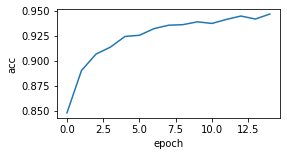

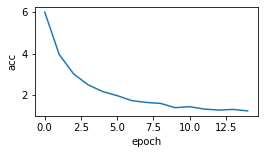

In [14]:
show_history(epoch_list, acc_list)
show_history(epoch_list, loss_list)

In [15]:
#評估模型準確率
print('Accuracy:', sess.run(accuracy, feed_dict={x:mnist.test.images, y_label:mnist.test.labels}))

Accuracy: 0.9451


In [16]:
#進行預測
prediction_result=sess.run(tf.argmax(y_predict,1), feed_dict={x:mnist.test.images})
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 5, 6, 9], dtype=int64)

In [17]:
import numpy as np
def show_prediction(images, labels, prediction, idx, num):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    for i in range(num):
        ax=plt.subplot(5,5,i+1)
        ax.imshow(np.reshape(images[idx],(28,28)), cmap='binary')
        title='label:'+str(np.argmax(labels[idx]))+' ,prediction:'+str(prediction[idx])
        
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

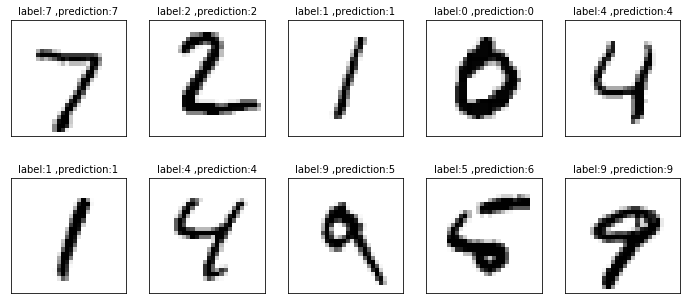

In [18]:
show_prediction(mnist.test.images, mnist.test.labels, prediction_result, 0, 10)

In [19]:
#找出預測錯誤
for i in range(mnist.test.num_examples):
    if prediction_result[i]!=np.argmax(mnist.test.labels[i]):
        print('i='+str(i)+
              ' prediction:'+str(prediction_result[i])+
              ' label:'+str(np.argmax(mnist.test.labels[i])))

i=7 prediction:5 label:9
i=8 prediction:6 label:5
i=63 prediction:2 label:3
i=78 prediction:8 label:9
i=114 prediction:2 label:7
i=142 prediction:2 label:3
i=149 prediction:4 label:2
i=151 prediction:3 label:9
i=158 prediction:2 label:3
i=233 prediction:7 label:8
i=235 prediction:7 label:9
i=241 prediction:8 label:9
i=244 prediction:3 label:2
i=245 prediction:1 label:3
i=247 prediction:2 label:4
i=259 prediction:0 label:6
i=264 prediction:4 label:9
i=300 prediction:1 label:4
i=320 prediction:7 label:9
i=321 prediction:7 label:2
i=324 prediction:7 label:0
i=340 prediction:3 label:5
i=341 prediction:9 label:6
i=359 prediction:4 label:9
i=387 prediction:1 label:2
i=403 prediction:4 label:8
i=412 prediction:3 label:5
i=414 prediction:7 label:9
i=431 prediction:2 label:8
i=435 prediction:9 label:8
i=445 prediction:0 label:6
i=478 prediction:6 label:5
i=547 prediction:8 label:2
i=551 prediction:1 label:7
i=578 prediction:2 label:3
i=582 prediction:2 label:8
i=591 prediction:2 label:8
i=596 p

In [20]:
sess.close()